### INE 410146 - Applied Machine Learning
$\textbf{Author: Prof. Mateus Grellert}$

Bibliography used in this lesson:
- Aggarwal, Charu C. Data mining: the textbook. Springer, 2015 - Chapter 10.3
- Han, J., Kamber, M. Data Mining: Concepts and Techniques - Chapter 8.2.1
- Norvig, P., Russel, P. Aritificial Intelligence: a Modern Approach - Chapter 18.3


# 11 - Trees and Ensembles

So far, we've discussed two important types of learning algorithms: linear models and neural networks. The resulting model of these techniques is represented as a series of parameters (usually represented as $\theta$) that are operated over the input features to make a final prediction. The operations involved are mostly arithmetic, like sums, multiplications, and even trigonometric functions. Therefore, we can represent these models as a combination of several mathematical functions and their parameters.

In this lesson, we will learn about a different approach that uses a **hierarchical decisions** to make predictions, forming structures that resemble a **tree**. Because of this characteristic, these methods are called tree-based learning algorithms, and they are widely used in practical machine learning applications.

We will also learn about a very efficient approach to reduce the variance of learning models called **ensemble**, which is based on the idea of training multiple models to collectively make predictions. This is analogous to the idea of calling a group of experts to decide on a difficult problem, since a group decision is less likely to be wrong than a decision made by a single expert.

Let's start with the most simple models and expand from it in the following sections. We will once again focus the discussion on classification models, but most algorithms present adaptations for regression problems as well.

## Decision Trees

**Decision trees (DT)** are models that make decisions based on a series of logical tests over the input features. They  represent  one  of  the  simplest  and  yet  most  successful  forms  of  machine learning. The figure below shows a typical decision tree for deciding if a customer should wait for a table at the restaurnt

<center>
<img src="FIGS/11-decision_tree_example.png" width="75%" /> <br/> (source: Norvig & Russel, Aritificial Intelligence: a Modern Approach) 
</center>

As the figure shows, a DT is composed of several tests on input attributes, represented as **nodes** in the tree. The **root** node is the starting point (first test). These tests are also called **split criteria**, and their outcome guides the traversal in the tree until a **terminal (leaf)** node is visited, where the decisions are made. Some decisions require less tests to be made, and are therefore in a shallower region, whereas others are made after several tests. 

We can observe that DTs work very similarly to the way we make decisions every day. For instance, if a restaurant is full, we usually ask about the waiting period at the reception desk. If it is too long (>60 min), we go somewhere else. If not, we may or may not wait depending on how hungry we are. This aspect makes decision trees models very **easy to interpret**, which is highly recommended for machine learning applications in other areas. This also motivates the use of DTs in the exploratory data analysis step.

The tree shown in the figure is non-binary and contains only categorical features, but this depends on the implementation. Some algorithms work only with binary trees, while others support only categorical features, etc. 

### Tree Learning Algorithms 

Although the general idea is quite intuitive, training a tree using only our data set is still a challenge. Given a data set $D$ and a set of attributes $S_A$, the general training algorithm for Decision Trees follows a greedy approach where a single feature is used to split the tree in each iteration. The pseudocode is presented below:

<div style="background-color:aliceblue;padding:5px;border-style:solid;border-width:1px;width:80%;">
    <strong>Tree learning algorithm: </strong>
<ol style="background-color:aliceblue">
<li> Pick an attribute $A$ from $S_A$ using criterion $C$
<li> Separate $D$ into smaller partitions for each outcome of split($A$)
<li> For each partition $P$:
<li> <p style="text-indent: 15px; margin:0">if $P$ should be split and $S_A\neq\emptyset$ then:</p>
<li><p style="text-indent: 30px; margin:0">go to step $1$ using $P$ as $D$</p>        
<li><p style="text-indent: 15px; margin:0">else:</p>
<li><p style="text-indent: 30px; margin:0">make it a leaf node</p>
</ol>
</div>

The first challenge we must solve is how we decide which feature is going to be picked in line $1$. The goal here is to find a criterion $C$ capable of separating the classes in each partition. This will greatly affect the resulting tree, because the outcome of this selection will create partitions of our data set based on splits over the feature's values. 

The second challenge involves deciding if a node should be further split or not (line $4$). Ideally, a node contains only instances from a single class, so we could say that we should keep splitting until this happens. However, it is known that this causes trees that are very deep, and this ultimately leads to overfitting. Therefore, DT implementations define thresholds that stop splitting even when complete separation is not possible. This is also an approach that can be used to reduce overfitting, as too much splits tend to create overfit trees.

The first implementation that became popular, called **Iterative Dichotomizer 3 (ID3)**, was created by Ross Quinlan in the 70s and published in 80s (paper available <a href="https://hunch.net/~coms-4771/quinlan.pdf">here</a>). Let's take a look at its algorithm (credits to <a href="https://towardsdatascience.com/decision-trees-for-classification-id3-algorithm-explained-89df76e72df1">this blog post</a>):

1. Calculate the Information Gain of each feature.
2. Considering that all rows don’t belong to the same class, split the dataset $S$ into subsets using the feature for which the Information Gain is maximum.
3. Make a decision tree node using the feature with the maximum Information gain.
4. If all rows belong to the same class, make the current node as a leaf node with the class as its label.
5. Repeat for the remaining features until we run out of all features, or the decision tree has all leaf nodes.

An interesting side effect of step 2 is that features that are not correlated with the output are automatically disregarded, as they will produce a very low information gain. Therefore, we say that tree models have an **embedded feature selection** mechanism.

Nowadays, ID3 is not used much in practice, since it only supports classification problems and categorical input features. Nevertheless, it was extremely important for the developement of better tree learning algorithms that followed. 

Currently, two implementations are mostly used: C4.5, created by Quinlan, (book can be bought <a href="https://www.amazon.com.br/C4-5-Programs-Learning-Ross-Quinlan/dp/1558602380">here</a>) and Classification and Regression Trees (CART), created by Breiman (book can be bought <a href="https://www.taylorfrancis.com/books/mono/10.1201/9781315139470/classification-regression-trees-leo-breiman-jerome-friedman-richard-olshen-charles-stone">here</a>). The latter is the one implemented in the ``scikit-learn`` package. The overall algorithms of C4.5 and CART are still the same described above for ID3. The difference among all these implementations lies in the following aspects: the splitting criterion, the capacity to handle missing data, support for classification and regression, and overfitting mitigation strategy. Let's see how these implementations compare in the table below themselves:

|   | ID3 | C4.5 | CART |
|---|---|---|---|
| split. criterion | Information Gain | Information Gain Ratio | Gini Impurity |
| numeric attributes | No | Yes | Yes |
| type of tree | nonbinary  | nonbinary | binary |
| supports regression | No | No | Yes |
| overfitting treatment| None | post-training pruning | post-training pruning |

The **Information Gain Ratio** used in the C4.5 implementation is simply a normalized IG score that reduces the gain of variables with too many categories. The **Gini Impurity** metric follows the same idea of IG, but uses a different, simpler formula. For a detaile comparison of Gini vs Information Gain see this <a href="https://towardsdatascience.com/gini-index-vs-information-entropy-7a7e4fed3fcb">blog post</a>.


### Selecting the best feature 

As mentioned in the previous section, the choice of which feature will be used in each node has a decisive effect on the structure of the tree that is built. Let's take an example of the how this selection is performed in the ID3 algorithm.

The ID3 feature selection uses knowledge from information theory to select the attribute that will split the data. Given a set of attributes $S_A$, it computes the **Information Gain (IG)** of each attribute and select the one that maximizes this metric. The IG computes how much information we are obtaining once we know the value of an attribute. In practice, it uses the reverse thinking: select the attribute that most reduces the randomness of our class distribution. 

This is achieved by computing the **Shannon's entropy**, which measures the average level of uncertainty in a random variable. Suppose we have a variable Y with N possible values, the entropy of X is computed as follows:

$H(Y)=-\sum\limits^N_{i=1}(P(y_i)*log(P(y_i))$

Let's take an example of a binary variable ($N=2$). If only $0s$ are present in $Y$, than $P(Y=0)=1$, $log(P(Y=0))$ is $0$, so $H(Y) = 0$ as well. This is smallest possible value of entropy and represents a variable that is completely predictable (no uncertainty). The other extreme case is that both $0s$ and $1s$ occurr at the same probability (P=0.5), then $log(P(Y=0))=-1$ and $log(P(Y=1))=-1$ as well (same probability), thus:

$H(Y) = -(P(Y=0)*log(P(Y=0)) + (P(Y=1)*log(P(Y=1)) = -(0.5*-1 + 0.5*-1) = 1$

Which gives us the maximum value of $H$, representing a variable with complete uncertainty.

Thinking of how trees are built, we can also compute the **average entropy** of a variable after it is split based on another. This makes sense because, when there is association between variables, we can reduce the uncertainty of one using the other. For instance, we can compute the entropy of $Y=\{\mathrm{rain}, ¬\mathrm{rain}\}$ given that $X\{\mathrm{cloudy}, ¬\mathrm{cloudy}\}$, expecting that it will give us a reduced entropy on each split. The formula goes as follows:

$IG(Y,A) = H(Y) – \sum\limits_{a in A}\frac{|A=a|}{|A|}*H(Y|A=a)$

In the equation above, $H(Y|A=a)$ is the entropy of all samples where attribute $A$ has value $a$, and the $\frac{|A=a|}{|A|}$ portion is simply a weighting term. Thus, we can summarize this metric as a measure of how much uncertainty is reduced from $Y$ once we know the value of attribute $A$. If the output is smaller than $H(Y)$, than $A$ has somehow contributed to improving our information (predictive power) over $Y$.


### A practical example of the information gain

Let's compute a simple example to show how all these equations are useful in the training process of tree models Suppose we have a data set containing input features of $C=\{\mathrm{cloudy}, ¬\mathrm{cloudy}\}$, $W=\{\mathrm{weekend}, ¬\mathrm{weekend}\}$, and a variable we want to predict $R=\{\mathrm{rain}, ¬\mathrm{rain}\}$ (we will use 0 for negative and 1 for positive cases):

| W | C | R |
|---|---|---|
| 0 | 0 | 0 |
| 1 | 1 | 1 |
| 0 | 1 | 1 |
| 1 | 0 | 0 |
| 1 | 0 | 0 |
| 0 | 1 | 1 |
| 0 | 1 | 0 |
| 1 | 1 | 1 |

Note that weekend should have no impact on the odds of raining or not, but the presence of clouds should in fact give us a more efficient prediction. Now let's see the $IG$ of these variables to know which one is more useful for predicting $R$. First we must compute the entroy of $R$, then compute the condition entropy of each feature. We will assume that both $W$ and $C$ are independent of $R$.

$H(R) = -(P(R=0)*log(P(R=0)) + (P(R=1)*log(P(R=1)) = -(0.5*-1 + 0.5*-1) = \textbf{1.0}$
<br><br>
$H(R|W=0) = -(2/4*log(2/4) + 2/4*log(2/4)) = 1.0$
<br>
$H(R|W=1) = -(2/4*log(2/4) + 2/4*log(2/4)) = 1.0$
<br>
$H(R|W) =  4/8*H(R|W=0) + 4/8*H(R|W=1) = 1.0$
<br><br>
$IG(R,W) = H(R) - H(R|W) = \textbf{0.0}$
<br><br>

Note that we compute the entropy for $W=0$ using only 4 samples (the ones where this variable actually assumes the value $0$), but the final weighting term used in $H(R|W)$ considers all the samples. Since the entropy of $R$ is maximum on weekends and on weekdays, the information gain of this variable is $0$. Now let's see how it goes for $C$.

$H(R|C=0) = -(0/3*log(0/3) + 3/3*log(3/3)) = 0.0$
<br>
$H(R|C=1) = -(1/5*log(1/5) + 4/5*log(4/5)) = 0.72$
<br>
$H(R|C) =  3/8*H(R|C=0) + 5/8*H(R|C=1) = 0.45$
<br><br>
$IG(R,C) = H(R) - H(R|C) = \textbf{0.55}$
<br><br>

As you can see, we reduce the entropy of $R$ to $0$ once we know it is not a cloudy day ($H(R|C=0)$). The overall gain of the $C$ variable is 0.55, which is quite good and shows that this variable has **importance** in the prediction of $R$. The word importance was highlighted because it is common to use the information gain or similar metrics to measure the importance of features during a feature selection process. 


### Practical example with Python

Training a Decision Tree in Python is as simple as it was with other classifiers. As mentioned, the CART algorithm is used in this process, and several hyperparameters can be tuned in the model training step. The recent versions of the ``scikit-learn`` also implement a very convenient method for plotting DTs, which we will see in the code below.

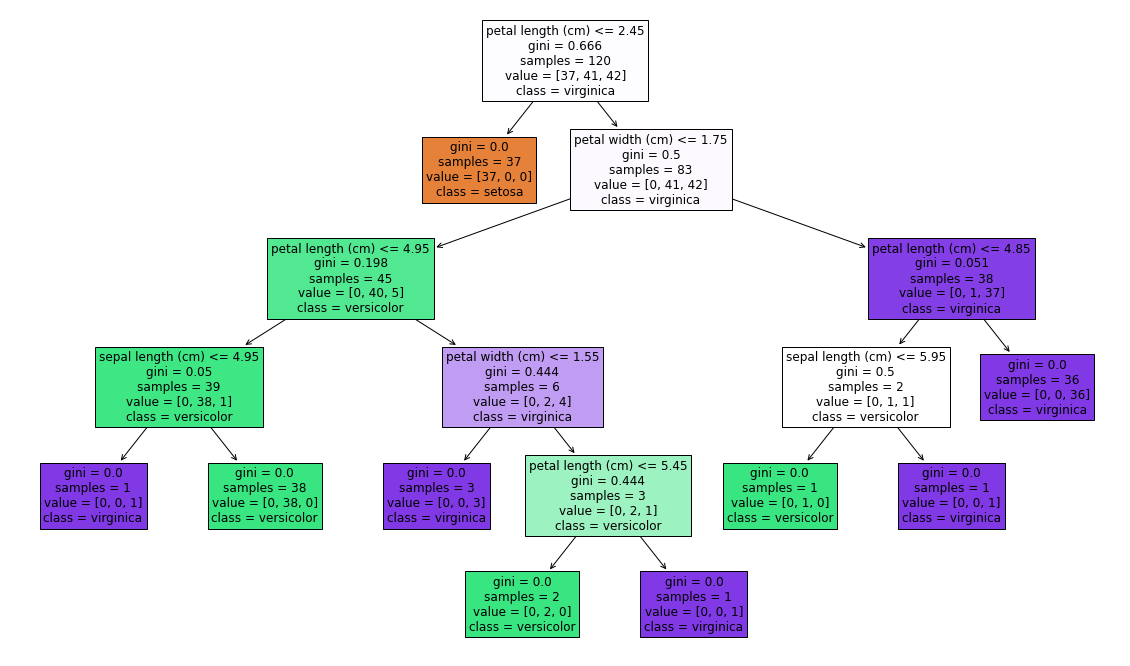

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.89      0.94         9
   virginica       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [1]:
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.datasets import load_iris
plt.rcParams.update({'font.size': 12})

iris = load_iris()

Xtr, Xte, ytr, yte = train_test_split(iris.data, iris.target, test_size = 0.2)

# training and plotting the tree
plt.figure(figsize=(20,12))
clf = DecisionTreeClassifier().fit(Xtr, ytr)
plot_tree(clf, filled=True, class_names = iris.target_names, feature_names = iris.feature_names, fontsize=12)
plt.show()

# test set evaluation
ypred = clf.predict(Xte)
print(classification_report(yte, ypred, target_names = iris.target_names ))

In each node of this tree, we can observe four things:
1. The split attribute and the tested value (except for leaf nodes)
2. The gini impurity of the node (smaller values are better)
3. The number of training samples that pass through that node
4. The distribution of the class values, which is used to color our tree in this cases
5. if the **class_names** parameter is passed, the most probable class is also given in each node

Note that the gini impurity decreases as we traverse down towards the leaf nodes. Also note that for this case we obtained a tree that is completely able to separate our training data set, while also performing well on our test set (with a 97% accuracy score). This is not the case for many practical applications. In fact, **Decision Trees tend to overfit**, which requires a careful tuning of its hyperparameters in the model training step.

### Handling overfitting

As we've mentioned, C4.5 and CART implement a post-training pruning step that reduces the chances of overfitting. In the CART algorithm, the pruning process is called **Minimal Cost-Complexity Pruning (CCP)** and was proposed by Breiman in his book. This strategy computes a cost-complexity measure using the formula below (obtained from the ``scikit-learn`` <a href="https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning">documentation</a>:

$R_\alpha(T) = R(T) + \alpha|\tilde{T}|$

Where $R(T)$ represents the total misclassification rate of the terminal nodes, $|\tilde{T}|$ represents the number of terminal nodes in $T$, and $\alpha$ is a weighting term that penalizes more or less trees with excessive amounts of terminal nodes. As we can see, $\alpha$ is actually a **regularization parameter** that can be used to train trees that are less prone to overfitting (which in this cases translates to too many leaves in the tree).

The hyperparamenter that represents $\alpha$ is called ``ccp_alpha`` in the ``scikit-learn`` implementation. In addition to this, Decision trees have several other hyperparameters that can be tuned to find a model with reduced chances of overfitting, but the most important ones are:
- ``min_samples_leaf``, which controls the minimum amount of samples that each leaf must have
- ``max_depth``, which controls the maximum depth of each tree branch

By default, the ``scikit-learn`` implementation favors overfit trees, as the ``max_depth`` parameter is ``None`` (no limit), and ``ccp_alpha`` is ``0``(no pruning). Thus, it is highly recommended to include the tuning of these hyperparamenters in a DT training pipeline.

In practice, DT models will overfit in many practical applications, even when careful tuning is performed. In the next section, we will see a very interesting approach that can further improve our models in terms of quality of fit.


## Ensembles

According to Norvig & Russel, the idea of **ensemble learning** methods is to select a collection, or ensemble,  of different classifiers and combine their predictions. Let's say we train twenty different decision trees using different partitions of our training set. A type of ensemble learning consists in having them vote on the best classification for a new example, selecting the one that was voted the most.

The motivation behind ensemble learning is simple. Let's consider a scenario where we have $K$ classifiers whose decisions are combined using a simple majority voting. A misclassification will occur only if at least $K/2+1$ classifiers make a wrong prediction, which we hope to be much less likely than a misclassification by a single classifier. 

In practice, we use ensemble models as a collection of **weak learners**, i.e., models that do not perform well when employed separately due to a high bias (less parameters) or variance (too many parameters). At the same time these base models can be combined to make a **strong learner**. 

Ensemble can be implemented with two main approaches: 
- bagging: each model is trained separately and independently. The predictions are combined in some type of avering or voting process.
- boosting: each model is trained sequentially in an adaptive way. The predictions are also combined in a sequential manner.

The figure below shows a very good illustration of these approaches.

<center>
    <img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1542651255/image_2_pu8tu6.png
" width="70%"/>
    (source: DataCamp - AdaBoost Classifier in Python - <a href="https://www.datacamp.com/community/tutorials/adaboost-classifier-python">link</a>)
</center>

### Bagging

Bagging is a **parallel** ensembling approach, which makes it very convenient for cluster- and cloud-based training pipelines. The term itself is an abbreviation of the words **bootstrap aggregating**. Bootstrapping is a statistical technique that consists in generating samples of size $B$ (called bootstrap samples) from an initial dataset of size $N$ by randomly drawing with replacement $B$ observations. The figure shows a bootstrapping illustration with $N=12$ and $B=5$.

<center>
    <img src="https://miro.medium.com/max/1400/1*lWnm3eJVe3uo95OcSg5jUA@2x.png" width="70%"/>
    (source: TWDS - Ensemble methods: bagging, boosting and stacking - <a href="https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205">link</a>)
</center>

Bootstrapping is actually widely used in statistical tests and procedures to analyze the statistical confidence of a result. This technique works under two assumptions: first, that the data from which samples are drawn from represents our underlying structure; second, that the size of $N$ is large enough compared to the size of $B$ so that they are not too correlated (thus, independent). While we can find ways to ensure the second, it is very difficult to ensure the first assumption in real applications (although we always hope that is the case).

Once we have bootstrapped partitions of our data set, the idea is to train different models with each and **average** their predictions to come up with a final solution. For **regression** problems, we can simply take the average of the output as the final result. For **classification**, the majority-voted class can be used as final output. We can also take the probability of each class instead of the class itself and then compute the final class based on average probability obtained. Finally, we can also weight the votes of each classifier based on its 

Bagging is considered a technique that mostly **reduces the variance** of our final model, so it can be used jointly with high-variance alternatives like deep DTs or NNs.

### Boosting

Boosting is a sequential ensemble method, in which models are iteratively trained one after the other. The information obtained in each training is used to **adapt** the following iterations and train models that improve the overall performance. In practice each model in the sequence is fitted giving **more importance to misclassified samples**, so that it can compensate the mistakes of the previous one.

There are two approaches to implement the adaptation process of this technique: adaptive boosting and gradient boosting.

**Adaptive boosting** (also called adaboost) is a technique that implements the adaptation of each classifier using **weighted predictions**. In other words, the classifiers are trained to minimize an error function that prioritizes examples that misclassified in the previous step. The sum of all weights must be 1, so we usually start by setting all weights to $1/N$, where $N$ is the number of training examples. After a classifier is trained, we adjust these weights so that misclassifications weight more and correct predictions weight less. This is achieved with the following formula:

<left>
\begin{equation}
    w_i=
    \begin{cases}
      e^{-\alpha_k}, & \text{if}\ h(x_i)=y_i \\
      e^{\alpha_k}, & \text{if}\ h(x_i)\neq y_i
    \end{cases}
    \\~\\
    \text{where}\ \alpha=\frac{1}{2}\log{\frac{1-\epsilon}{\epsilon}}
\end{equation}
</left>

The idea is simple: the exponential function gives values between $0$ and $1$ for negative exponents, and values $>\!1$ for positive ones. The $\alpha$ term is computed depends on the error of the classifier ($\epsilon$), so that classifiers with higher errors cause stronger updates and vice-versa. This term is also used as a weighting factor for the classifier that is trained in each iteration. After all weights are updated, they are normalized such that their sum is still $1$.

Boosting **reduces the bias** of the ensemble, so base models with high bias are preferred in this approach, such as shallow DTs and Perceptrons.

### Bagging and Boosting with Trees

The ``skickit-learn`` package already contains an ``ensemble`` model that can be used to build models using bagging (``BaggingClassifier`` or ``BaggingRegressor``) and adaboost (``AdaBoostClassifier`` of ``AdaBoostRegressor``). Let's train our known DTs using these models and compare them. We will use a shallow tree for boosting and a deeper one for bagging. We will also train more estimators for the boosting method to make both ensembles closer in terms of complexity (although there was no actual balancing and the parameters used are probably far from optimal).


In [2]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
# introspect the images arrays to find the shapes (for plotting)

X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2)

clf_bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=20), n_estimators = 10)
clf_boosting = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), n_estimators = 200)

clf_bagging.fit(Xtr, ytr)
clf_boosting.fit(Xtr, ytr)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=200)

In [3]:
# test set evaluation
ypred_bagging = clf_bagging.predict(Xte)
ypred_boosting = clf_boosting.predict(Xte)
print("### BAGGING RESULTS ###")
print(classification_report(yte, ypred_bagging, target_names = target_names ))
print("\n### BOOSTING RESULTS ###")
print(classification_report(yte, ypred_boosting, target_names = target_names ))


### BAGGING RESULTS ###
                   precision    recall  f1-score   support

     Ariel Sharon       0.29      0.12      0.17        16
     Colin Powell       0.61      0.62      0.62        48
  Donald Rumsfeld       0.55      0.25      0.34        24
    George W Bush       0.61      0.86      0.72       101
Gerhard Schroeder       0.64      0.41      0.50        22
      Hugo Chavez       0.47      0.57      0.52        14
       Tony Blair       0.72      0.39      0.51        33

         accuracy                           0.60       258
        macro avg       0.56      0.46      0.48       258
     weighted avg       0.59      0.60      0.57       258


### BOOSTING RESULTS ###
                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00        16
     Colin Powell       0.65      0.50      0.56        48
  Donald Rumsfeld       0.83      0.21      0.33        24
    George W Bush       0.52      0.93      0.67       101
Ge

We can see that, for this particular data set and training configurations, the bagging approach surpasses the boosting implementation. Of course that a fair comparison requires a much broader exploration of the hyperparameters (the ones of the base estimator and of the ensembler as well).

### Contemporary approaches

When it comes to ensembles of tree models, we can highlight two approaches that refine the algorithms mentioned above, so let's talk about them a little bit.

The first noteworthy alternative comes from **Random Forests**, proposed by our one and only Leo Breiman (paper <a href="https://link.springer.com/article/10.1023/A:1010933404324">here</a>). Random Forests are bagging models based on training deep trees with a twist: each tree is trained with a random subset of the input features. The idea is to reduce the correlation between the models of the ensemble, thus allowing that each tree specializes a little bit differently from the others. These models are often employed successfully in many practical applications and have been the favorite of many practitioners until a second guest arrived in 2016.

The **eXtreme Gradient Boosting (XGBoost)** algorithm is a boosting method that was created in 2014, became known in 2015 (after reaching the top charts in many Kaggle challenges), and was published in 2016. The paper  by Tianqi Chen and Carlos Guestrin can be found <a href="https://dl.acm.org/doi/10.1145/2939672.2939785">here</a>. As the name suggests, the weight update rule is based on the **gradient** of the prediction error, not the error itself. There are many interesting features implemented in the XGBoost algorithm that make it interesting, like automatic feature selection, cache-aware implementation for optimized throughput, out-of-core optimizations for large scale data, among others.

While XGboost has a lot of momentum and is likely to become the favorite ensemble method for many practitioners, RFs are still highly effective and may even lead to better prediction performance in some applications. The superior performance of XGBoost comes speacially for its scalabil. Both implementations are available in the latest version of the ``scikit-learn`` package (e.g., for classification we have the ``RandomForestClassifier`` and ``XGBClassifier`` classes), so we invite you to get to know them and compare them in terms of complexity and prediction performance. As motivation, we bring this chart that shows the algorithms used by the top 5 teams in several kaggle competitions.

<center>
<img src="https://pbs.twimg.com/media/D3Pb_Q3UIAAuSWU?format=jpg&name=medium" width="70%" />
    (source: a tweet by François Chollet, creator of Keras - <a href="https://twitter.com/fchollet/status/1113476428249464833?lang=en">link</a>)
</center>

### Reduced bias-variance at the cost of interpretability

One of the main challenges that AI solutions are facing nowadays surrounds the confidence that users have on such systems. We can train a deep NN capable of detecting skin cancer with more than 95% accuracy, but this is all for nothing if health professionals struggle to rely on such predictions. 

There are several variables that play a role in this lack of trust, but an important one emerges from the lack of **interpretability** of the trained models. For instance, we get really excited after a DNN like AlexNet performs so well for object recognition, but we cannot explain how exactly the network comes up with each individual answer, and also why it fails when it does.  This is becoming such a grave issue that the term **Explainable AI (XAI)** became a field of research in many applied studies (medicine, autonomous vehicles, etc).

Decision trees are known as **white box** models in the sense that they can be easily interpreted and explained to an expert of a different field. Its predictions are also easy to understand and can be transformed into natural language with little effort. 

When we create tree ensembles, we are trading this interpretability for a better prediction performance, so this must be carefully considered when building an applied solution. 


## Summary
- Tree-based learning models are intuitive and easy to interpret. This makes them quite appealing for applied ML solutions. At the same time, Decision Trees are prone to overfitting.
- The algorithms for training DTs are all very similar and use knowledge from information theory (like entropy and gini impurity) to measure the importance of features. Since this also discards irrelevant features from the training process, tree-based learners have a built-in feature selection mechanism.
- To overcome the overfitting of standalone trees, ensemble methods can be used. There are two main approaches: bagging and boosting. Bagging works well on parallel systems and reduces the variance of models, whereas boosting works well on reducing the bias of models.
- Ensemble methods lead to increased performance at the cost of interpretability. This must be taken in consideration specially for applied ML solution.

In our next lesson, we will talk a little bit about **unsupervised learning** using cluster-based algorithms.

<h1> <center> See you all in our next lesson! &#128516; </center> </h1>